In [124]:
import numpy as np 
import matplotlib.pyplot as plt

# Création d'un Carré

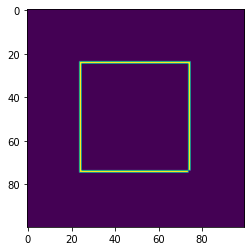

In [125]:

def carre_im():
    largeur = 100
    hauteur = 100

    image_carre = np.zeros((hauteur, largeur))

    image_carre[24:74,24] =255
    image_carre[24:74,74] = 255
    image_carre[24,24:74] = 255
    image_carre[74,24:74] =255

    plt.imshow(image_carre)
    
    coordinates = np.where(image_carre == 255)

    rows, cols = coordinates
    
    s = np.array([complex(a, b) for a,b in zip(rows, cols)])
    
    return s 

s = carre_im()
    
    

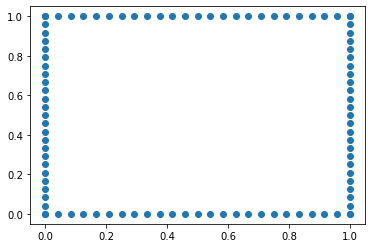

In [169]:
def carre(n,long):
    X=[]
    Y=[]
    x=np.linspace(0,long,n//4)
    for i in x:
        X.append(i)
        Y.append(0)
    for j in x:
        X.append(long)
        Y.append(j)
    for i in x[::-1]:
        X.append(i)
        Y.append(long)
    for j in x[::-1]:
        X.append(0)
        Y.append(j)
    return X,Y


X,Y=carre(100,1)

plt.scatter(X,Y)
plt.show()
    

In [170]:
def complexification(X,Y):
    L=[]
    for x in range(len(X)):
        L.append(X[x]+1j*Y[x])
    return L

def decomplexification(L):
    X=np.array([z.real for z in L])
    Y=np.array([z.imag for z in L])
    return X,Y
    


L=complexification(X,Y)

X,Y = decomplexification(L)


# Coefficients de Fourier pour reconstruction 

$$C_p = \sum_{n=0}^{N-1}s_ne^{\frac{-2\pi inp}{N}}$$

N est le support de s, on peut ensuite reconstruire s avec la Transformée de Fourier inverse 

$$s_n "=" \dfrac{1}{P}\sum_{p=0}^{P-1}C_pe^{\frac{2\pi inp}{P}}$$

Il y a égalité si P=N, sinon nous n'avons qu'une approximation de $s_n$

In [171]:
def Cp(L,p):
    N = len(L) 
    E = np.array( [[np.exp(-2*np.pi*1j*n*p/N) for n in range(N)]])
    return (L*E).sum()

    

In [172]:
# Il ne peut pas y avoir plus de coefficients de Fourier que d'éléments dans l'échantillon de départ
list_Cp=[Cp(L,p) for p in range(len(L))]

def TFinv(list_Cp,P,n): 
    E= np.array([np.exp(2*np.pi*1j*n*p/P) for p in range(P)])
    CP=np.array(list_Cp[0:P])
    
    return (CP*E).sum()/P

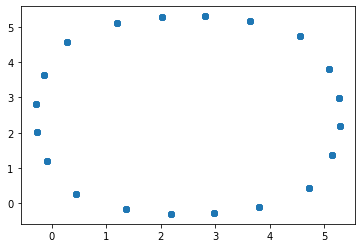

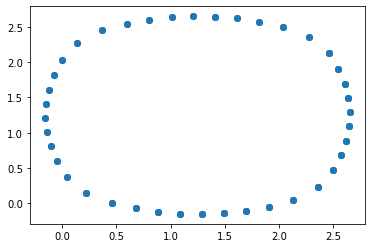

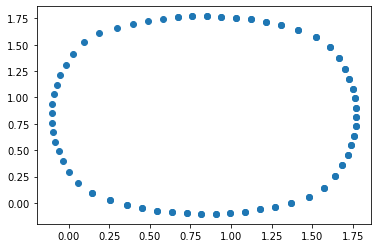

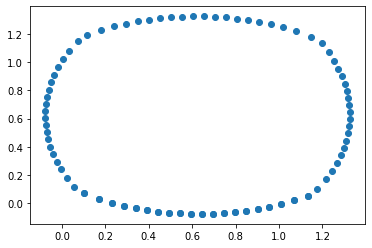

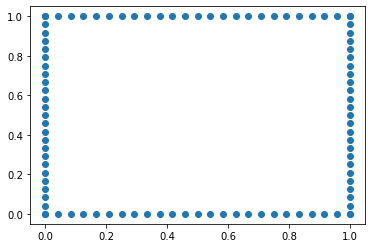

In [173]:


def reconstruction(P):
    long=len(L)
    s_reconstruit=[TFinv(list_Cp,P,n) for n in range(long)]

    X=[x.real for x in s_reconstruit]
    Y=[y.imag for y in s_reconstruit]

    plt.scatter(X,Y)
    plt.show()

for i in range(1,6):
    reconstruction(20*i)


# Coefficients invariants par décalage dans l'espace

Soit $\Delta_x$ et $\Delta_y$ correspondant à notre décalage
$$
\tilde{C_p} = \sum_{n=0}^{N-1}(s_n + \Delta_x +\Delta_y i)e^{\frac{-2\pi inp}{N}} = \sum_{n=0}^{N-1}s_ne^{\frac{-2\pi inp}{N}} + (\Delta_x +\Delta_y i) \times\sum_{n=0}^{N-1}e^{\frac{-2\pi inp}{N}}
$$

or $\displaystyle\sum_{n=0}^{N-1}e^{\frac{-2\pi inp}{N}} =0$ si $p\neq0$ (somme géométrique) donc seul le coefficient $C_0$ sera différent. Il suffit donc de considérer uniquement $\{C_1,\dots, C_N\}$

donc pour $p\geq1$ :  

$$
\tilde{C_p} = \sum_{n=0}^{N-1}s_ne^{\frac{-2\pi inp}{N}} = C_p
$$


In [174]:
#Construire des coefficients invariants pour un décalage Delta 

D = 1+2j
L = np.array(L)
L_D = L + D



In [175]:
list_Cp = np.array([Cp(L,p) for p in range(1,len(L))])
list_Cp_D = np.array([Cp(L_D,p) for p in range(1,len(L_D))])

list_Cp_D-list_Cp < 10**(-10) 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

En effet on remarque que le coefficients $C_p$ et $C_pD$ sont très proches et qu'ils coïncident au moins à $10^{-10}$. 

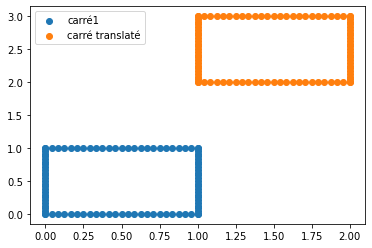

In [176]:
X,Y = decomplexification(L)
X_D, Y_D =  decomplexification(L_D)

plt.scatter(X,Y,label='carré1')
plt.scatter(X_D,Y_D,label='carré translaté')
plt.legend()
plt.show()

# Coefficients invariants par rotations 

Soit $e^{\theta i}$ correspondant à notre rotation d'angle $\theta$.

$$
\tilde{C_p} = \sum_{n=0}^{N-1}e^{\theta i}\times s_n e^{\frac{-2\pi inp}{N}} = e^{\theta i} \times \sum_{n=0}^{N-1}s_ne^{\frac{-2\pi inp}{N}} $$

or $|e^{\theta i}| = 1$, il nous suffit de concidérer $|\tilde{C_p}|$ pour avoir $|\tilde{C_p}| = |C_p|$. 


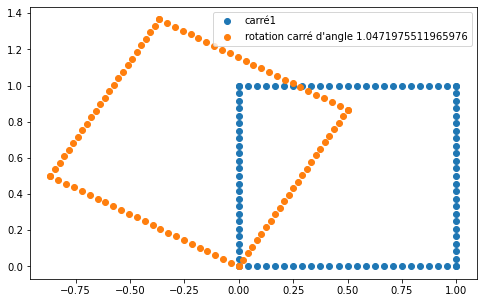

In [205]:
theta = np.pi/3
R = np.exp(theta*1j)
L = np.array(L)
L_R = R*L

X,Y = decomplexification(L)
X_R, Y_R =  decomplexification(L_R)

plt.figure(figsize=(8,5))
plt.scatter(X,Y,label='carré1')
plt.scatter(X_R,Y_R,label=f"rotation carré d'angle {theta}")
plt.legend()
plt.show()


In [208]:
list_Cp = np.array([np.abs(Cp(L,p)) for p in range(len(L))])
list_Cp_R = np.array([np.abs(Cp(L_R,p)) for p in range(len(L_R))])

np.abs(list_Cp_R-list_Cp) < 10**(-10) 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

# Invariance par homothétie

Soit $\phi \in \mathbb{R}$ correspondant à notre facteur d'homothétie.

$$
\dfrac{\tilde{C_p}}{\tilde{C_1}} = \dfrac{\sum_{n=0}^{N-1}\phi\times s_n e^{\frac{-2\pi inp}{N}}}{\sum_{n=0}^{N-1}\phi\times s_n e^{\frac{-2\pi in}{N}}} = \dfrac{\phi\times\sum_{n=0}^{N-1}\times s_n e^{\frac{-2\pi inp}{N}}}{\phi\times\sum_{n=0}^{N-1}\times s_n e^{\frac{-2\pi in}{N}}}= \dfrac{\sum_{n=0}^{N-1}\times s_n e^{\frac{-2\pi inp}{N}}}{\sum_{n=0}^{N-1}\times s_n e^{\frac{-2\pi in}{N}}} = \dfrac{C_p}{C_1} $$


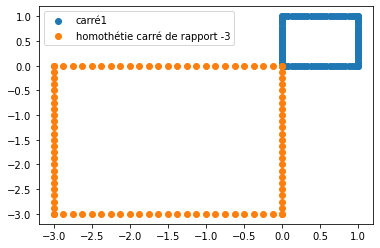

In [200]:

H = -3
L = np.array(L)
L_H = H*L

X,Y = decomplexification(L)
X_H, Y_H =  decomplexification(L_H)

plt.scatter(X,Y,label='carré1')
plt.scatter(X_H,Y_H,label=f'homothétie carré de rapport {H}')
plt.legend()
plt.show()

In [207]:
list_Cp = np.array([Cp(L,p)/Cp(L,1) for p in range(len(L))])
list_Cp_H = np.array([Cp(L_H,p)/Cp(L_H,1) for p in range(len(L_H))])

np.abs(list_Cp_H-list_Cp) < 10**(-10) 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

# Conclusion 

Implanter des nouveaux descripteurs de Fourier invariants en rotation, translation et homothétie, il suffit de considérer les coefficients suivants : 
$$\left\{\left|\dfrac{C_2}{C_1}\right|,\dots, \left|\dfrac{C_N}{C_1}\right|\right\}$$



In [214]:
import numpy.random as npr

0.25*npr.randn()

-0.0884885393535105

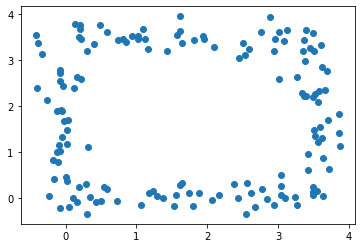

In [247]:
def carre_gaussien(n,long,alpha):
    X=[]
    Y=[]
    x=np.linspace(0,long,n//4)
    for i in x:
        X.append(i+alpha*npr.randn())
        Y.append(0+alpha*npr.randn())
    for j in x:
        X.append(long+alpha*npr.randn())
        Y.append(j +alpha*npr.randn())
    for i in x[::-1]:
        X.append(i+alpha*npr.randn())
        Y.append(long+alpha*npr.randn())
    for j in x[::-1]:
        X.append(0+alpha*npr.randn())
        Y.append(j+alpha*npr.randn())
    return X,Y


X,Y=carre_gaussien(150,3.5,0.2)

plt.scatter(X,Y)
plt.show()

L=complexification(X,Y)


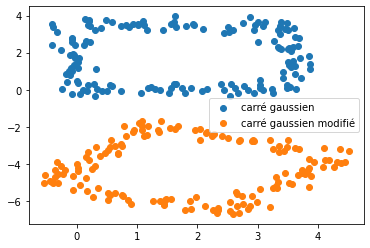

In [251]:
D = 1+2j
H = -1
theta = np.pi/3
R = np.exp(theta*1j)
L = np.array(L)
L_M = (L + D)*R*H



X,Y = decomplexification(L)
X_M, Y_M =  decomplexification(L_M)

plt.scatter(X,Y,label='carré gaussien')
plt.scatter(X_M,Y_M,label='carré gaussien modifié')
plt.legend()
plt.show()

In [252]:
list_Cp = np.array([np.abs(Cp(L,p)/Cp(L,1)) for p in range(1,len(L))])
list_Cp_M = np.array([np.abs(Cp(L_M,p)/Cp(L_M,1)) for p in range(1,len(L_M))])

np.abs(list_Cp_M-list_Cp) < 10**(-10) 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,